#Application for Convert Json file from Lable Studio to Json from Cord-v2

In [ ]:
import json


# create directory for opening all of json files ......

In [ ]:

# import os
# import json

# directory = "aaa"  # Geben Sie den Pfad zum Verzeichnis an

# # Schleife über alle Dateien im Verzeichnis
# for filename in os.listdir(directory):
#     if filename.endswith(".JSON"):  # Überprüfen, ob die Dateiendung ".json" ist
#         file_path = os.path.join(directory, filename)
#         with open(file_path) as file:
#             data = json.load(file)
#             print(f"Datei: {filename}")
#             print(f"Schlüssel: {keys}")
#             print("----------------------")

#open the raw json file extracted from the customer's receipt
including :
1.   name of pizza
2.   count of pizza
3.   price of pizza
4.   size of pizza
5.   Netto price
6.   Payment











In [ ]:
import glob
import os

all_files = glob.glob("./*.*")
f = [f for f in all_files if 'json' in f.lower()]

for jfile in f:
  os.rename(jfile, jfile.lower())

In [ ]:
raw = open("34.json") # raw ist Json con Cord-V2
raw_data = json.load(raw)

In [ ]:
raw_data.keys()

dict_keys(['gt_parse', 'meta', 'valid_line', 'ROI'])

# open the json file extracted from (Label Studio Sofware)
with LabelStudio we labeled our receips

In [ ]:
lable_s = open("34_label_s.json") # 1_LS.json ist unser Json Code aus dem Label studio
lable_s_data = json.load(lable_s)
lable_s_data.keys()

dict_keys(['id', 'data', 'annotations', 'predictions'])

In [ ]:
lable_s_data['annotations'][0].keys()

dict_keys(['id', 'created_username', 'created_ago', 'completed_by', 'result', 'was_cancelled', 'ground_truth', 'created_at', 'updated_at', 'lead_time', 'last_action', 'task', 'project', 'updated_by', 'parent_prediction', 'parent_annotation', 'last_created_by'])

In [ ]:
result = lable_s_data['annotations'][0]['result']


# we only need results that include (text)
--> therefore we delete dulications and additions

In [ ]:
result_clean = []# ohne Duplikation bzw. liste mit (Text)
for i in range(len(result)):
    if 'text' in result[i]['value']:
        result_clean.append(result[i])

In [ ]:
result_clean[0]['original_width']

1279

In [ ]:
raw_data['meta']['image_size']['width'], raw_data['meta']['image_size']['height'] = result_clean[0]['original_width'], result_clean[0]['original_height']
# matching image size ín Raw_data and LabelStudio

#Definition of three main parts of our receipts
--> menu , Subtotal , total

In [ ]:
menu = raw_data['gt_parse']['menu']
subtotal = raw_data['gt_parse']['sub_total']
total = raw_data['gt_parse']['total']

### converting the orginal_width and orginal_height to pixel

In [ ]:
# converting to pixel
for i in result_clean:
    w = i["original_width"]
    h = i["original_height"]
    for j in i['value']['points']:
        j[0] = int(round(j[0]*w/100))
        j[1] = int(round(j[1]*h/100))
        print(j)

[17, 317]
[69, 314]
[75, 372]
[26, 372]
[17, 317]
[69, 314]
[75, 372]
[26, 372]
[147, 309]
[152, 371]
[93, 378]
[90, 302]
[147, 309]
[152, 371]
[93, 378]
[90, 302]
[164, 301]
[257, 299]
[263, 379]
[164, 379]
[164, 301]
[257, 299]
[263, 379]
[164, 379]
[462, 303]
[464, 381]
[283, 387]
[272, 294]
[462, 303]
[464, 381]
[283, 387]
[272, 294]
[954, 303]
[1097, 303]
[1105, 396]
[956, 396]
[954, 303]
[1097, 303]
[1105, 396]
[956, 396]
[19, 474]
[184, 478]
[173, 545]
[26, 536]
[19, 474]
[184, 478]
[173, 545]
[26, 536]
[968, 489]
[1128, 489]
[1126, 545]
[981, 538]
[968, 489]
[1128, 489]
[1126, 545]
[981, 538]
[28, 590]
[19, 540]
[209, 529]
[218, 586]
[28, 590]
[19, 540]
[209, 529]
[218, 586]
[983, 536]
[985, 594]
[1128, 596]
[1139, 553]
[983, 536]
[985, 594]
[1128, 596]
[1139, 553]
[26, 642]
[263, 640]
[255, 717]
[26, 713]
[26, 642]
[263, 640]
[255, 717]
[26, 713]
[977, 635]
[1130, 631]
[1130, 719]
[979, 719]
[977, 635]
[1130, 631]
[1130, 719]
[979, 719]


## start with first part of our receipts (menu)

In [ ]:
menu

[{'nm': 'Pan Salami', 'cnt': '1', 'price': '9,99', 'etc': '28'}]

In [ ]:
for i in menu:
  print(i.keys())

dict_keys(['nm', 'cnt', 'price', 'etc'])


##create a function of raw data for set coordinates
--> we have to set 8 cordinations of each word in labeled text

In [ ]:
def raw_data_cordination(text):
  raw_data['valid_line'][n_vl]['words'].append({
        'quad': {
            'x1': result_clean[n]['value']['points'][0][0],
            'y1': result_clean[n]['value']['points'][0][1],
            'x2': result_clean[n]['value']['points'][1][0],
            'y2': result_clean[n]['value']['points'][1][1],
            'x3': result_clean[n]['value']['points'][2][0],
            'y3': result_clean[n]['value']['points'][2][1],
            'x4': result_clean[n]['value']['points'][3][0],
            'y4': result_clean[n]['value']['points'][3][1]
        },
        'is_key': 0,
        'row_id': 0,
        'text': text
    })

##create a function of raw data for append new words

In [ ]:
def raw_data_append_words(category):
  raw_data['valid_line'].append({'words':[], 'category':category,'group_id':0,'sub_group_id':0})

### meun -->
nm(name of Pizza) , cnt(count of Pizza) , price , etc(Size of Pizza)

In [ ]:

n_vl = 0 # number of valid_line


#get the name of pizza


for i in menu:
    nm = i['nm'].split(" ") # name of Pizza

    for j in nm:
        for n in range(len(result_clean)): #result_clean gibt es in Json aus LabelStudio
            if j == result_clean[n]['value']['text'][0]:
                raw_data_append_words(category="menu.nm")
                raw_data_cordination(j)
                n_vl+=1
                print("name = ",j)
                result_clean.pop(n) # we use this code for delete duplicates

                break

#get the count of pizza


    cnt = i['cnt']
    for n in range(len(result_clean)):
        if cnt == result_clean[n]['value']['text'][0] and result_clean[n]["from_name"] == "transcription":
            raw_data_append_words(category="menu.cnt")
            raw_data_cordination(cnt)
            n_vl+=1
            print("count = ",cnt)
            result_clean.pop(n)
            break

#get the price of pizza


    price = i['price'].split(" ")[0]

    for n in range(len(result_clean)):
       if price == result_clean[n]['value']['text'][0]:
            raw_data_append_words(category="menu.price")
            raw_data_cordination(price)
            n_vl+=1
            print("price = ",price)
            result_clean.pop(n)
            break

#get the size of pizza


    if "etc" in i.keys():
      etc = i["etc"]
      for n in range(len(result_clean)):
       if etc == result_clean[n]['value']['text'][0]:
            raw_data_append_words(category="menu.etc")
            raw_data_cordination(etc)
            n_vl+=1
            print("size = ",etc)
            result_clean.pop(n)
            break

name =  Pan
name =  Salami
count =  1
price =  9,99
size =  28


# sub_total ---> Netto, subtotal_price





In [ ]:
subtotal

{'subtotal_price': '9,34'}

In [ ]:
sub_total_value = subtotal["subtotal_price"]

for n in range(len(result_clean)):
  if "Netto" == result_clean[n]['value']['text'][0]:
                raw_data_append_words(category="subtotal.subtotal_price")
                raw_data_cordination("Netto")
                n_vl+=1
                print("Netto(sub_total_price) = ",sub_total_value)
                result_clean.pop(n)
                break

Netto(sub_total_price) =  9,34


In [ ]:
for n in range(len(result_clean)):
  if sub_total_value == result_clean[n]['value']['text'][0]:
                raw_data_append_words(category="subtotal.subtotal_price")
                raw_data_cordination(sub_total_value)
                n_vl+=1
                print("sub_total = ",sub_total_value)
                result_clean.pop(n)
                break

sub_total =  9,34


##Total ---> total_price(Gesamt) , creditcardprice , cashprice

###total_price(Gesamt)

In [ ]:
total.keys()

dict_keys(['total_price', 'creditcardprice'])

In [ ]:
total_price_value = total["total_price"]

for n in range(len(result_clean)):
  if "Gesamt" == result_clean[n]['value']['text'][0]:
                raw_data_append_words("total.total_price")
                raw_data_cordination("Gesamt")
                n_vl+=1
                print("Gesamt(total_price) = ",total_price_value)
                result_clean.pop(n)
                break

Gesamt(total_price) =  9,99


In [ ]:
if "creditcardprice" in total.keys():
  creditcardprice_value =  total["creditcardprice"]
  for n in range(len(result_clean)):
    if creditcardprice_value == result_clean[n]['value']['text'][0]:
                raw_data_append_words("total.creditcardprice")
                raw_data_cordination(creditcardprice_value)
                n_vl+=1
                print("total_credit = ",creditcardprice_value)
                result_clean.pop(n)
                break

total_credit =  9,99


###Creditcardprice (EC Karte,Klarna,PayPal,ApplePay)

In [ ]:
total.keys()

dict_keys(['total_price', 'creditcardprice'])

In [ ]:
if "creditcardprice" in total.keys():
  creditcardprice_value =  total["creditcardprice"]
  for n in range(len(result_clean)):
    if "EC"  == result_clean[n]['value']['text'][0]:
                raw_data_append_words("total.creditcardprice")
                raw_data_cordination("EC")
                n_vl+=1
                print("total_credit(EC) = ",creditcardprice_value)
                result_clean.pop(n)
                break

  for n in range(len(result_clean)):
    if "Karte"  == result_clean[n]['value']['text'][0]:
                raw_data_append_words("total.creditcardprice")
                raw_data_cordination("Karte")
                n_vl+=1
                print("total_credit(Karte) = ",creditcardprice_value)
                result_clean.pop(n)
                break

In [ ]:
if "creditcardprice" in total.keys():
  creditcardprice_value =  total["creditcardprice"]
  for n in range(len(result_clean)):
    if "Klarna" == result_clean[n]['value']['text'][0]:
                raw_data_append_words("total.creditcardprice")
                raw_data_cordination("Klarna")
                n_vl+=1
                print("total_credit(Klarna) = ",creditcardprice_value)
                result_clean.pop(n)
                break

In [ ]:
if "creditcardprice" in total.keys():
  creditcardprice_value =  total["creditcardprice"]
  for n in range(len(result_clean)):
    if "PayPal" == result_clean[n]['value']['text'][0]:
                raw_data_append_words("total.creditcardprice")
                raw_data_cordination("PayPal")
                n_vl+=1
                print("total_credit(PayPal) = ",creditcardprice_value)
                result_clean.pop(n)
                break

In [ ]:
if "creditcardprice" in total.keys():
  creditcardprice_value =  total["creditcardprice"]
  for n in range(len(result_clean)):
    if "ApplePay" == result_clean[n]['value']['text'][0]:
                raw_data_append_words("total.creditcardprice")
                raw_data_cordination("ApplePay")
                n_vl+=1
                print("total_credit(ApplePay) = ",creditcardprice_value)
                result_clean.pop(n)
                break

total_credit(ApplePay) =  9,99


In [ ]:
if "creditcardprice" in total.keys():
  creditcardprice_value =  total["creditcardprice"]
  for n in range(len(result_clean)):
    if creditcardprice_value == result_clean[n]['value']['text'][0]:
                raw_data_append_words("total.creditcardprice")
                raw_data_cordination(creditcardprice_value)
                n_vl+=1
                print("total_credit = ",creditcardprice_value)
                result_clean.pop(n)
                break

total_credit =  9,99


##Cashprice

In [ ]:
total

{'total_price': '9,99', 'creditcardprice': '9,99'}

In [ ]:
if "cashprice" in total.keys():
  cashprice_value = total["cashprice"]
  for n in range(len(result_clean)):
            if cashprice_value == result_clean[n]['value']['text'][0]:
                raw_data_append_words("total.cashprice")
                raw_data_cordination(cashprice_value)
                n_vl+=1
                print("cashprice(Bar) = ",cashprice_value)
                result_clean.pop(n)
                break

In [ ]:

if "cashprice" in total.keys():
  cashprice_value = total["cashprice"]
  for n in range(len(result_clean)):
            if "Bar" == result_clean[n]['value']['text'][0]:
                raw_data_append_words("total.cashprice")
                raw_data_cordination("Bar")
                n_vl+=1
                print("cashprice(Bar) = ",cashprice_value)
                result_clean.pop(n)
                break

In [ ]:

if "cashprice" in total.keys():
  cashprice_value = total["cashprice"]
  for n in range(len(result_clean)):
            if cashprice_value == result_clean[n]['value']['text'][0]:
                raw_data_append_words("total.cashprice")
                raw_data_cordination(cashprice_value)
                n_vl+=1
                print("cashprice = ",cashprice_value)
                result_clean.pop(n)
                break

else:
  for n in range(len(result_clean)):
    if total_price_value == result_clean[n]['value']['text'][0]:
                raw_data_append_words("total.total_price")
                raw_data_cordination(total_price_value)
                n_vl+=1
                print("(total_price) = ",total_price_value)
                result_clean.pop(n)
                break

#save raw_data as json File (raw_data_final_output.json)

In [ ]:
with open('raw_data_final_output.json', 'w') as fp:
    json.dump(raw_data, fp)

In [ ]:
raw_data['valid_line']

[{'words': [{'quad': {'x1': 164,
     'y1': 301,
     'x2': 257,
     'y2': 299,
     'x3': 263,
     'y3': 379,
     'x4': 164,
     'y4': 379},
    'is_key': 0,
    'row_id': 0,
    'text': 'Pan'}],
  'category': 'menu.nm',
  'group_id': 0,
  'sub_group_id': 0},
 {'words': [{'quad': {'x1': 462,
     'y1': 303,
     'x2': 464,
     'y2': 381,
     'x3': 283,
     'y3': 387,
     'x4': 272,
     'y4': 294},
    'is_key': 0,
    'row_id': 0,
    'text': 'Salami'}],
  'category': 'menu.nm',
  'group_id': 0,
  'sub_group_id': 0},
 {'words': [{'quad': {'x1': 17,
     'y1': 317,
     'x2': 69,
     'y2': 314,
     'x3': 75,
     'y3': 372,
     'x4': 26,
     'y4': 372},
    'is_key': 0,
    'row_id': 0,
    'text': '1'}],
  'category': 'menu.cnt',
  'group_id': 0,
  'sub_group_id': 0},
 {'words': [{'quad': {'x1': 954,
     'y1': 303,
     'x2': 1097,
     'y2': 303,
     'x3': 1105,
     'y3': 396,
     'x4': 956,
     'y4': 396},
    'is_key': 0,
    'row_id': 0,
    'text': '9,99'}],
  '

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from PIL import Image, ImageDraw, ImageFont
from os.path import join
import os
import json
from tqdm.notebook import tqdm

In [ ]:
image = Image.open("34.jpg")   # Load an Image Example
with open("raw_data_final_output.json") as json_file:
    gt_data = json.load(json_file)   # Ground Truth
group_sample = gt_data["valid_line"][0]
word_sample = group_sample["words"][0]

In [ ]:
print(f'The premier keys of Image:\n\t {gt_data.keys()}')
print(f'The keys of Each Group:\n\t {group_sample.keys()}')
print(f'The keys of Each Word:\n\t {word_sample.keys()}')

print(f'The Meta information of the image:\n\t {gt_data["meta"]}')
#print(f'The ROI of the image:\n\t {gt_data["roi"]}')
print(f'The category of the firts group of words:\n\t {group_sample["category"]}')
print(f'The information of the first Word:\n\t {word_sample}')

The premier keys of Image:
	 dict_keys(['gt_parse', 'meta', 'valid_line', 'ROI'])
The keys of Each Group:
	 dict_keys(['words', 'category', 'group_id', 'sub_group_id'])
The keys of Each Word:
	 dict_keys(['quad', 'is_key', 'row_id', 'text'])
The Meta information of the image:
	 {'version': '2.0.0', 'split': 'train', 'image_id': 34, 'image_size': {'width': 1279, 'height': 821}}
The category of the firts group of words:
	 menu.nm
The information of the first Word:
	 {'quad': {'x1': 164, 'y1': 301, 'x2': 257, 'y2': 299, 'x3': 263, 'y3': 379, 'x4': 164, 'y4': 379}, 'is_key': 0, 'row_id': 0, 'text': 'Pan'}


In [ ]:
import random

labels = ['menu.cnt',
 'menu.etc',
 'menu.nm',
 'menu.price',
 'subtotal.subtotal_price',
 'total.cashprice',
 'total.creditcardprice',
 'total.total_price'
]

# Define the color of each class
get_colors = lambda n: list(map(lambda i: "#" + "%06x" % random.randint(0, 0xFFFFFF),range(n)))
colors = get_colors(len(labels))
label2color = dict(zip(labels, colors))  # Link the labels and colors as a dictionary

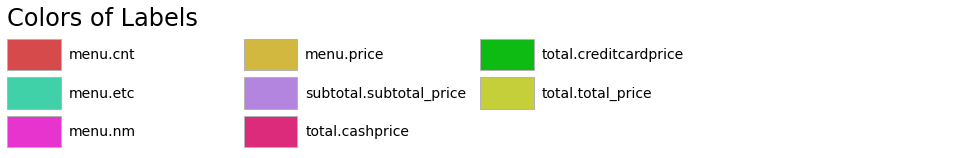

In [ ]:
from matplotlib.patches import Rectangle

def plot_colortable(colors, title, emptycols=0):

    cell_width = 212
    cell_height = 22
    swatch_width = 48
    margin = 60
    topmargin = 40

    n = len(colors)
    ncols = 4 - emptycols
    nrows = n // ncols + int(n % ncols > 0)

    width = cell_width * 4 + 2 * margin
    height = cell_height * nrows + margin + topmargin
    dpi = 72

    fig, ax = plt.subplots(figsize=(width / dpi, height / dpi), dpi=dpi)
    fig.subplots_adjust(margin/width, margin/height,
                        (width-margin)/width, (height-topmargin)/height)
    ax.set_xlim(0, cell_width * 4)
    ax.set_ylim(cell_height * (nrows-0.5), -cell_height/2.)
    ax.yaxis.set_visible(False)
    ax.xaxis.set_visible(False)
    ax.set_axis_off()
    ax.set_title(title, fontsize=24, loc="left", pad=10)

    for i, name in enumerate(list(colors.keys())):
        row = i % nrows
        col = i // nrows
        y = row * cell_height

        swatch_start_x = cell_width * col
        text_pos_x = cell_width * col + swatch_width + 7

        ax.text(text_pos_x, y, name, fontsize=14,
                horizontalalignment='left',
                verticalalignment='center')

        ax.add_patch(
            Rectangle(xy=(swatch_start_x, y-9), width=swatch_width,
                      height=18, facecolor=colors[name], edgecolor='0.7')
        )

    return fig

plot_colortable(label2color, "Colors of Labels", emptycols=1)
plt.tight_layout()
plt.show()

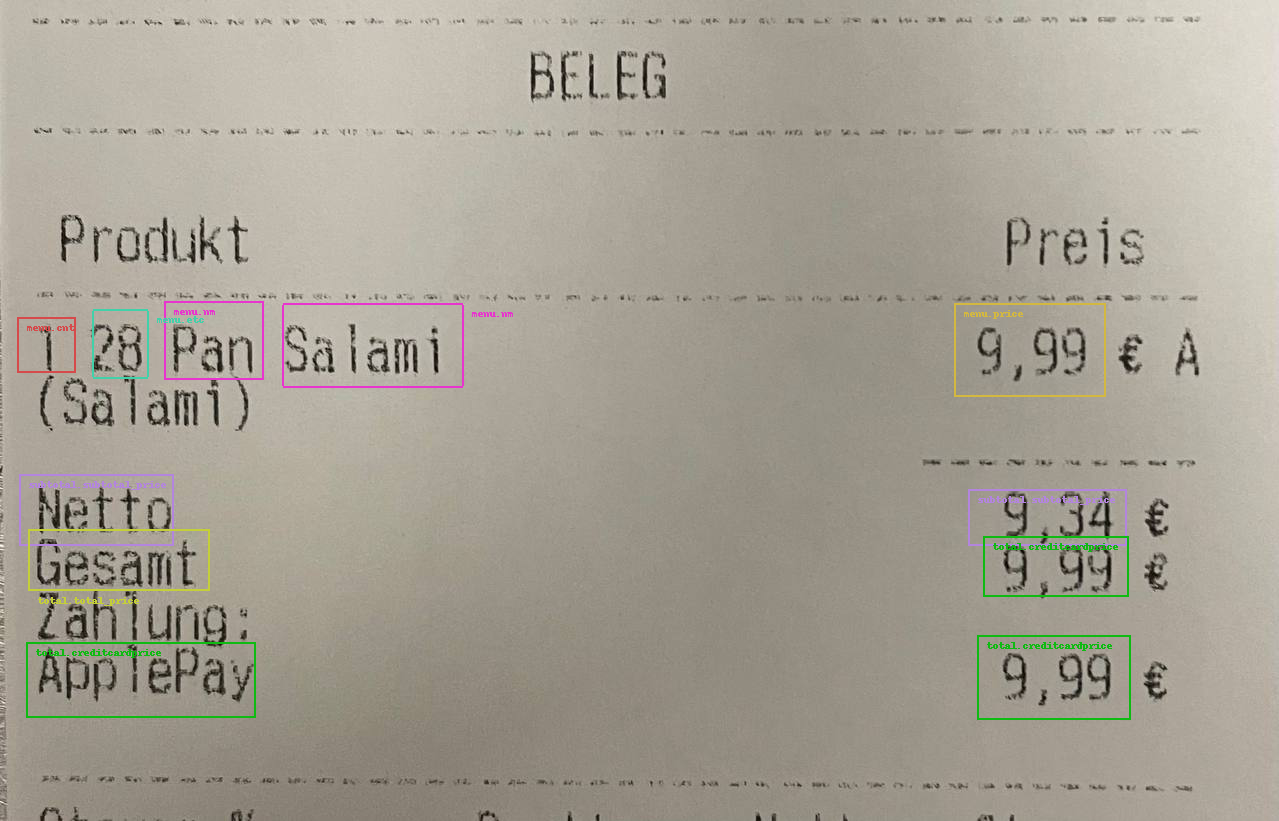

In [ ]:
draw = ImageDraw.Draw(image, 'RGBA')

for group in gt_data['valid_line']:
    label = group["category"]
    words = group["words"]
    for word in words:
        rect = word["quad"]  # the coordiante of the bounding box of this each word
        box = [rect['x1'], rect['y1'], rect['x3'], rect['y3']]
        draw.rectangle(box, outline=label2color[label], width=2)
        draw.text((box[0]+10, box[1]+5), label, fill=label2color[label])

image